### Data Story
Exploring the dataset on SF city employee salary data from Kaggle (https://www.kaggle.com/kaggle/sf-salaries) to come up with some visualizations of the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#sal_all = pd.DataFrame.from_csv('Salaries.csv')
sal_all = pd.read_table('Salaries.csv', sep=r',', skipinitialspace=True)
sal_all.head()
sal_all.shape

C:\Users\Vibhav\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(148654, 13)

In [3]:
sal_all.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Cleaning the data**
1. Using rows with totalpay > 1000
2. BasePay is not numerictype. Changing type to numeric
3. Using rows with BasePay, TotalPay and TotalPayBenefits not null
4. Normalizing name and job titles to be upper case
5. Discarding rows with Name set to 'NOT PROVIDED'
6. Some names have extra whitespaces, hence getting rid of them


In [4]:

sal_info = sal_all[sal_all.TotalPay>1000]
for col in ['BasePay','OvertimePay','OtherPay', 'Benefits']:
    sal_info[col] = pd.to_numeric(sal_info[col], errors='coerce')

sal_info=sal_info[sal_info.BasePay.notnull()]
sal_info=sal_info[sal_info.TotalPay.notnull()]
sal_info=sal_info[sal_info.TotalPayBenefits.notnull()]
sal_info.loc[:,'EmployeeName'] = sal_info.loc[:,'EmployeeName'].str.upper().str.replace('  ',' ')
#sal_info.loc[:,'EmployeeName'] = sal_info.loc[:,'EmployeeName']
sal_info.loc[:,'JobTitle'] = sal_info.loc[:,'JobTitle'].str.upper().str.replace('  ',' ')
sal_info = sal_info[sal_info.EmployeeName != 'NOT PROVIDED']

C:\Users\Vibhav\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
s1 = sal_info.groupby(['Year','EmployeeName']).TotalPayBenefits.mean().unstack('Year').fillna(0)
s1.head()

Year,2011,2012,2013,2014
EmployeeName,,,,
A BERNARD FATOOH,20039.91,23514.85,29379.24,30153.03
A ELIZABETH MARCHASIN,26282.86,0.00,0.00,0.00
A JAMIL NIAZI,87496.21,0.00,0.00,0.00
A K FINIZIO,0.00,0.00,0.00,26113.37
A. JAMES ROBERTSON II,19473.92,22711.70,22601.80,0.00


In [6]:
s2 = sal_info.groupby(['Year','EmployeeName']).TotalPay.mean().unstack('Year').fillna(0)
s2.head()

Year,2011,2012,2013,2014
EmployeeName,,,,
A BERNARD FATOOH,20039.91,18500.19,23923.62,24061.35
A ELIZABETH MARCHASIN,26282.86,0.00,0.00,0.00
A JAMIL NIAZI,87496.21,0.00,0.00,0.00
A K FINIZIO,0.00,0.00,0.00,25854.81
A. JAMES ROBERTSON II,19473.92,22065.71,22601.80,0.00


In [7]:
s3 = sal_info.groupby(['Year','JobTitle']).TotalPay.mean().unstack('Year').fillna(0)
s3.head()

Year,2011,2012,2013,2014
JobTitle,,,,
ACCOUNT CLERK,44565.196829,46066.717765,46133.322414,38924.085444
ACCOUNTANT,47429.268000,0.000000,0.000000,0.000000
ACCOUNTANT I,0.000000,66632.716667,68527.130000,45404.635000
ACCOUNTANT II,0.000000,63847.613056,69785.547403,68204.682078
ACCOUNTANT III,0.000000,78904.527241,81097.447865,80334.537041


In [8]:
s3.loc[:,2011].sort_values(ascending=False).head(10)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
EXECUTIVE CONTRACT EMPLOYEE                       277438.840000
CHIEF OF POLICE                                   267992.590000
ADMINISTRATOR, SFGH MEDICAL CENTER                257124.440000
DEPUTY CHIEF III (POLICE DEPARTMENT)              250026.488000
DEPARTMENT HEAD V                                 233834.037143
PORT DIRECTOR                                     233357.280000
Name: 2011, dtype: float64

In [9]:
s3.loc[:,2014].sort_values(ascending=False).head(10)

JobTitle
CHIEF INVESTMENT OFFICER        339653.700000
CHIEF OF POLICE                 326716.760000
CHIEF, FIRE DEPARTMENT          326233.440000
GEN MGR, PUBLIC TRNSP DEPT      294000.180000
DEP CHF OF DEPT (FIRE DEPT)     285575.785000
DEPUTY CHIEF 3                  282918.775000
ADMINISTRATOR, DPH              282619.960000
MAYOR                           281537.170000
ASST CHF OF DEPT (FIRE DEPT)    279768.958333
DEPT HEAD V                     279408.864000
Name: 2014, dtype: float64

Notice a change in the JobTitle names from 2011 and other years. Since the names were either a subset or a partial match across years, decided to use manually update them for the top 20 paid titles

In [10]:
sal_info=sal_info.replace({'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)' : 'CHIEF, FIRE DEPARTMENT'})
sal_info=sal_info.replace({'ASSISTANT MEDICAL EXAMINER' : 'ASST MED EXAMINER'})
sal_info=sal_info.replace({'DEPUTY CHIEF III (POLICE DEPARTMENT)' : 'DEPUTY CHIEF 3'})
sal_info=sal_info.replace({'DEPARTMENT HEAD V' : 'DEPT HEAD V'})
sal_info=sal_info.replace({'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)' : 'ASSISTANT DEPUTY CHIEF 2'})
sal_info=sal_info.replace({'DEPUTY DIRECTOR I - MUNICIPAL TRANSPORTATION AGE' : 'DEPUTY DIR I, MTA'})
sal_info=sal_info.replace({'DEPUTY DIRECTOR V' : 'DEP DIR V'})
sal_info=sal_info.replace({'LIEUTENANT, BUREAU OF FIRE PREVENTION AND PUBLIC S' : 'LIEUT,FIRE PREV'})
sal_info=sal_info.replace({'CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL)' : 'CFDNTAL CHF ATTY 2,(CVL&CRMNL)'})
sal_info=sal_info.replace({'CAPTAIN III (POLICE DEPARTMENT)' : 'CAPTAIN 3'})
sal_info=sal_info.replace({'DEPUTY DIRECTOR II - MUNICIPAL TRANSPORTATION AG' : 'DEPUTY DIR II, MTA'})
sal_info=sal_info.replace({'BATTALION CHIEF, (FIRE DEPARTMENT)' : 'BATTALION CHIEF, FIRE SUPPRESS'})
sal_info=sal_info.replace({'DEPARTMENT HEAD IV' : 'DEPT HEAD IV'})
sal_info=sal_info.replace({'COMMANDER III, (POLICE DEPARTMENT)' : 'CAPTAIN 3'})
sal_info=sal_info.replace({'ADMINISTRATOR, SFGH MEDICAL CENTER' : 'ADM, SFGH MEDICAL CENTER'})
sal_info=sal_info.replace({'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY' : 'GEN MGR, PUBLIC TRNSP DEPT'})
sal_info=sal_info.replace({'ASSISTANT DEPUTY CHIEF II' : 'ASSISTANT DEPUTY CHIEF 2'})
sal_info=sal_info.replace({'DEPUTY DIRECTOR OF INVESTMENTS' : 'DEP DIR FOR INVESTMENTS, RET'})
sal_info=sal_info.replace({'BATTLION CHIEF, FIRE SUPPRESSI' : 'BATTALION CHIEF, FIRE SUPPRESS'})
sal_info=sal_info.replace({'BATTLION CHIEF, FIRE SUPPRESS' : 'BATTALION CHIEF, FIRE SUPPRESS'})
sal_info=sal_info.replace({'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)' : 'ASST CHF OF DEPT (FIRE DEPT)'})

#sal_info=sal_info.replace({'' : ''})
#sal_info=sal_info.replace({'' : ''})
#sal_info=sal_info.replace({'' : ''})



In [11]:
s3 = sal_info.groupby(['Year','JobTitle']).TotalPay.mean().unstack('Year').fillna(0)
s3.head()

Year,2011,2012,2013,2014
JobTitle,,,,
ACCOUNT CLERK,44565.196829,46066.717765,46133.322414,38924.085444
ACCOUNTANT,47429.268000,0.000000,0.000000,0.000000
ACCOUNTANT I,0.000000,66632.716667,68527.130000,45404.635000
ACCOUNTANT II,0.000000,63847.613056,69785.547403,68204.682078
ACCOUNTANT III,0.000000,78904.527241,81097.447865,80334.537041


In [12]:
s3.loc[:,2011].sort_values(ascending=False).head(20)

JobTitle
GEN MGR, PUBLIC TRNSP DEPT                            399211.275000
DEP DIR FOR INVESTMENTS, RET                          307899.460000
CHIEF, FIRE DEPARTMENT                                302377.730000
EXECUTIVE CONTRACT EMPLOYEE                           277438.840000
CHIEF OF POLICE                                       267992.590000
ADM, SFGH MEDICAL CENTER                              257124.440000
DEPUTY CHIEF 3                                        250026.488000
ASSISTANT DEPUTY CHIEF 2                              247712.651250
DEPT HEAD V                                           233834.037143
PORT DIRECTOR                                         233357.280000
BATTALION CHIEF, FIRE SUPPRESS                        216655.536889
NURSING SUPERVISOR PSYCHIATRIC                        216598.635000
FORENSIC TOXICOLOGIST                                 215318.200000
CFDNTAL CHF ATTY 2,(CVL&CRMNL)                        214988.680000
ASST MED EXAMINER                      

In [13]:
s3.loc[:,2012].sort_values(ascending=False).head(20)

JobTitle
CHIEF OF POLICE                   321552.110000
CHIEF, FIRE DEPARTMENT            314759.600000
GEN MGR, PUBLIC TRNSP DEPT        294000.170000
EXECUTIVE CONTRACT EMPLOYEE       273776.240000
ASST CHF OF DEPT (FIRE DEPT)      270674.816667
ASSISTANT DEPUTY CHIEF 2          266246.406000
ASST MED EXAMINER                 264686.237500
ADM, SFGH MEDICAL CENTER          264364.820000
DEPUTY CHIEF 3                    263809.070000
MAYOR                             260574.050000
CONTROLLER                        255696.730000
DEP DIR FOR INVESTMENTS, RET      241613.080000
PORT DIRECTOR                     241568.640000
EMERGENCY MEDICAL SVCS CHIEF      240063.500000
DEPT HEAD V                       237181.042857
DISTRICT ATTORNEY                 227238.020000
NURSING SUPERVISOR PSYCHIATRIC    225958.712500
WIRE ROPE CABLE MAINT SPRV        224833.470000
BATTALION CHIEF, FIRE SUPPRESS    224413.624444
DEP CHF OF DEPT (FIRE DEPT)       224253.940000
Name: 2012, dtype: float64

In [14]:
s3.loc[:,2013].sort_values(ascending=False).head(20)

JobTitle
CHIEF OF POLICE                   339282.070000
CHIEF, FIRE DEPARTMENT            336922.010000
DEP DIR FOR INVESTMENTS, RET      315572.010000
GEN MGR, PUBLIC TRNSP DEPT        305307.890000
ASST CHF OF DEPT (FIRE DEPT)      294846.676667
DEP CHF OF DEPT (FIRE DEPT)       292964.780000
MAYOR                             285446.370000
DEPT HEAD V                       284682.141667
ADM, SFGH MEDICAL CENTER          276831.500000
DEPUTY CHIEF 3                    272874.673333
ASSISTANT DEPUTY CHIEF 2          271560.976000
CONTROLLER                        270641.530000
BATTALION CHIEF, FIRE SUPPRESS    267057.512187
EXECUTIVE CONTRACT EMPLOYEE       258351.775000
PORT DIRECTOR                     253895.000000
EMERGENCY MEDICAL SVCS CHIEF      253601.820000
DISTRICT ATTORNEY                 252221.060000
INCIDENT SUPPORT SPECIALIST       247200.803333
COMMANDER 3                       242005.953333
CITY ATTORNEY                     234738.180000
Name: 2013, dtype: float64

In [15]:
s3.loc[:,2014].sort_values(ascending=False).head(20)

JobTitle
CHIEF INVESTMENT OFFICER          339653.700000
CHIEF OF POLICE                   326716.760000
CHIEF, FIRE DEPARTMENT            326233.440000
GEN MGR, PUBLIC TRNSP DEPT        294000.180000
DEP CHF OF DEPT (FIRE DEPT)       285575.785000
DEPUTY CHIEF 3                    282918.775000
ADMINISTRATOR, DPH                282619.960000
MAYOR                             281537.170000
ASST CHF OF DEPT (FIRE DEPT)      279768.958333
DEPT HEAD V                       279408.864000
EXECUTIVE CONTRACT EMPLOYEE       278544.710000
ADM, SFGH MEDICAL CENTER          268946.020000
CONTROLLER                        267914.000000
ASST MED EXAMINER                 264458.635000
PORT DIRECTOR                     252149.010000
BATTALION CHIEF, FIRE SUPPRESS    250173.942581
ASSISTANT DEPUTY CHIEF 2          249505.880000
DISTRICT ATTORNEY                 248767.060000
MANAGER, DEPT PUBLIC HEALTH       248637.570000
EMERGENCY MEDICAL SVCS CHIEF      244209.180000
Name: 2014, dtype: float64

In [16]:
s3.sort_values(by=[(2011)], ascending=False).head(20)

Year,2011,2012,2013,2014
JobTitle,,,,
"GEN MGR, PUBLIC TRNSP DEPT",399211.275000,294000.170000,305307.890000,294000.180000
"DEP DIR FOR INVESTMENTS, RET",307899.460000,241613.080000,315572.010000,0.000000
"CHIEF, FIRE DEPARTMENT",302377.730000,314759.600000,336922.010000,326233.440000
EXECUTIVE CONTRACT EMPLOYEE,277438.840000,273776.240000,258351.775000,278544.710000
CHIEF OF POLICE,267992.590000,321552.110000,339282.070000,326716.760000
"ADM, SFGH MEDICAL CENTER",257124.440000,264364.820000,276831.500000,268946.020000
DEPUTY CHIEF 3,250026.488000,263809.070000,272874.673333,282918.775000
ASSISTANT DEPUTY CHIEF 2,247712.651250,266246.406000,271560.976000,249505.880000
DEPT HEAD V,233834.037143,237181.042857,284682.141667,279408.864000


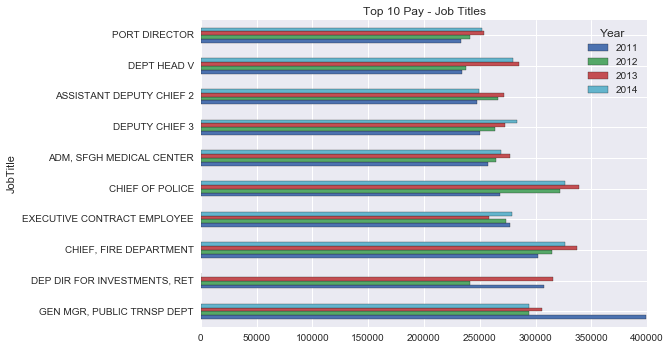

In [17]:
s3.sort_values(by=[(2011)], ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Pay - Job Titles')

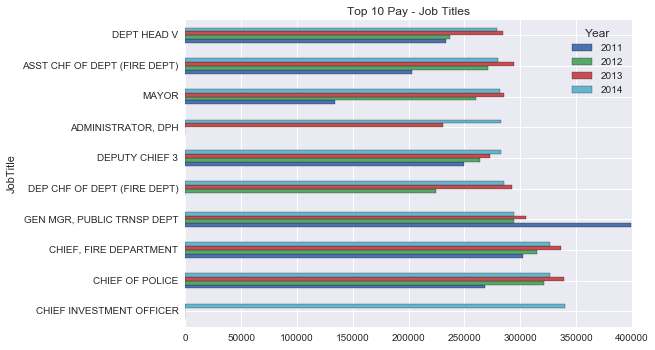

In [18]:
s3.sort_values(by=[(2014)], ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Pay - Job Titles')

In [19]:
s4 = sal_info.groupby(['Year','EmployeeName']).TotalPay.mean().unstack('Year').fillna(0)
s4.head()

Year,2011,2012,2013,2014
EmployeeName,,,,
A BERNARD FATOOH,20039.91,18500.19,23923.62,24061.35
A ELIZABETH MARCHASIN,26282.86,0.00,0.00,0.00
A JAMIL NIAZI,87496.21,0.00,0.00,0.00
A K FINIZIO,0.00,0.00,0.00,25854.81
A. JAMES ROBERTSON II,19473.92,22065.71,22601.80,0.00


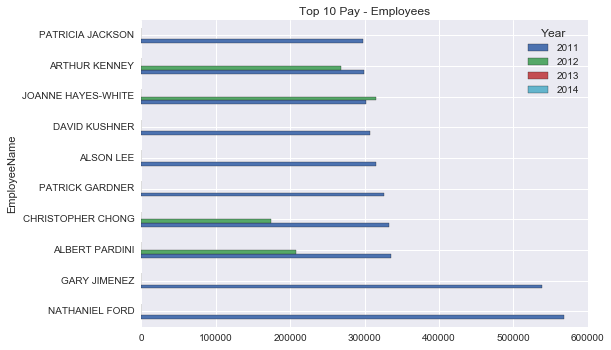

In [20]:
s4.sort_values(by=([2011,2012,2013,2014]), ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Pay - Employees')

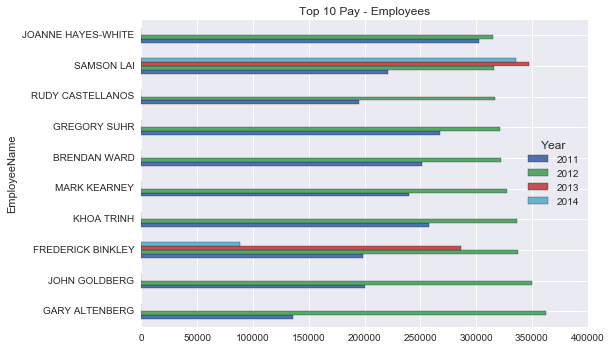

In [21]:
s4.sort_values(by=([2012,2013,2014,2011]), ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Pay - Employees')

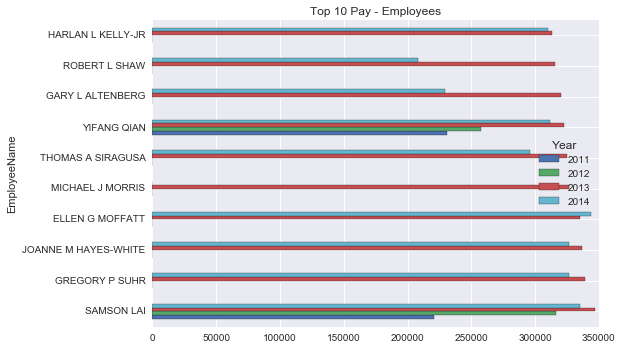

In [22]:
s4.sort_values(by=([2013,2014,2011,2012]), ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Pay - Employees')

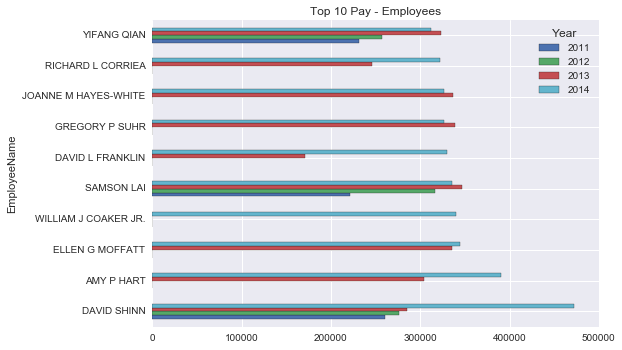

In [23]:
s4.sort_values(by=([2014,2013,2012,2011]), ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Pay - Employees')

In [24]:
s4 = sal_info.groupby(['Year','EmployeeName']).TotalPay.mean().unstack('Year').fillna(0)
s4.head()


Year,2011,2012,2013,2014
EmployeeName,,,,
A BERNARD FATOOH,20039.91,18500.19,23923.62,24061.35
A ELIZABETH MARCHASIN,26282.86,0.00,0.00,0.00
A JAMIL NIAZI,87496.21,0.00,0.00,0.00
A K FINIZIO,0.00,0.00,0.00,25854.81
A. JAMES ROBERTSON II,19473.92,22065.71,22601.80,0.00


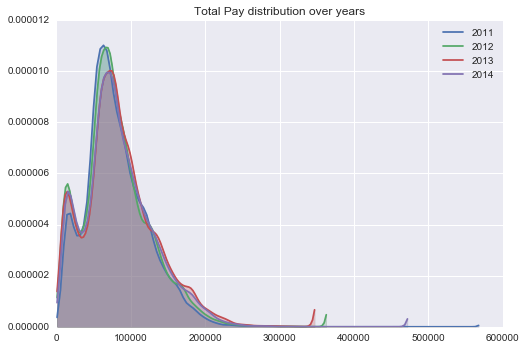

In [25]:
#sns.distplot(s3.loc[s3.loc[:,2011]>0,2011], bins=200,kde=True, rug=False)
sns.kdeplot(s4.loc[s4.loc[:,2011]>100,2011], shade=True, cut=0)
sns.kdeplot(s4.loc[s4.loc[:,2012]>100,2012], shade=True, cut=0)
sns.kdeplot(s4.loc[s4.loc[:,2013]>100,2013], shade=True, cut=0)
sns.kdeplot(s4.loc[s4.loc[:,2014]>100,2014], shade=True, cut=0)
plt.title('Total Pay distribution over years')

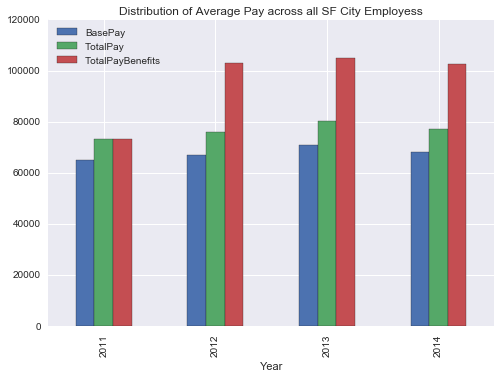

In [26]:

sal_info.groupby('Year')['BasePay','TotalPay','TotalPayBenefits'].mean().plot(kind='bar')
plt.title('Distribution of Average Pay across all SF City Employess')

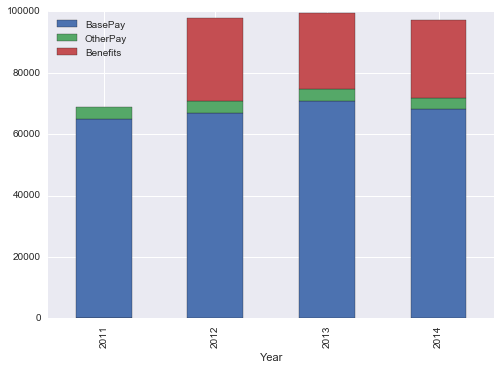

In [27]:
sal_info.groupby('Year')['BasePay','OtherPay','Benefits'].mean().plot(kind='bar',stacked=True)

In [28]:
top_ten_positions = sal_info.JobTitle.value_counts().sort_values(ascending=False).head(10).index

In [29]:
sal_info[sal_info.JobTitle.isin(top_ten_positions)].groupby(['Year','JobTitle'])['TotalPay'].mean().unstack('Year')

Year,2011,2012,2013,2014
JobTitle,,,,
CUSTODIAN,41032.534033,43796.874392,49975.372539,49422.989735
DEPUTY SHERIFF,94820.128453,102700.342935,115140.679763,116719.872151
FIREFIGHTER,139643.278422,147100.045594,154292.596313,140026.586180
PATIENT CARE ASSISTANT,NaN,49286.083954,46531.266429,48333.593686
POLICE OFFICER 3,NaN,134841.479045,141765.261296,136406.621741
PUBLIC SVC AIDE-PUBLIC WORKS,NaN,8580.456875,8116.409036,9980.210012
RECREATION LEADER,7051.718221,7312.446214,7669.463070,8154.261130
REGISTERED NURSE,107322.524195,110028.139779,121846.689352,117882.048906
SPECIAL NURSE,33062.372442,34480.400014,35294.077390,35576.398669


In [30]:
#Seems like PATIENT CARE ASSISTANT and POLICE OFFICER 3 had different title names in 2011
n1 = sal_info[(sal_info.JobTitle=='PATIENT CARE ASSISTANT') &(sal_info.Year>2011) ]['EmployeeName'].head(20)
sal_info[(sal_info.EmployeeName.isin(n1)) & (sal_info.Year<2013)]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
10213,10214,SAN SWE,MENTAL HEALTH REHABILITATION WORKER,60178.45,30169.85,5578.01,NaN,95926.31,95926.31,2011,NaN,San Francisco,NaN
10758,10759,BETTE AGPALASIN,MENTAL HEALTH REHABILITATION WORKER,60193.00,28437.91,5243.90,NaN,93874.81,93874.81,2011,NaN,San Francisco,NaN
10801,10802,LINAFLOR HUAB,MENTAL HEALTH REHABILITATION WORKER,60206.60,27161.13,6349.50,NaN,93717.23,93717.23,2011,NaN,San Francisco,NaN
10936,10937,GREGORIO GAYAGOY JR,MENTAL HEALTH REHABILITATION WORKER,60086.85,27935.75,5085.50,NaN,93108.10,93108.10,2011,NaN,San Francisco,NaN
11285,11286,MARIA SUSAN CAMPO,MENTAL HEALTH REHABILITATION WORKER,59981.40,25716.34,5902.06,NaN,91599.80,91599.80,2011,NaN,San Francisco,NaN
11297,11298,JOCELYN REYES,MENTAL HEALTH REHABILITATION WORKER,60178.45,25293.66,6080.53,NaN,91552.64,91552.64,2011,NaN,San Francisco,NaN
11494,11495,NIDA CASTILLON,MENTAL HEALTH REHABILITATION WORKER,59981.40,25947.75,5035.30,NaN,90964.45,90964.45,2011,NaN,San Francisco,NaN
12308,12309,JOVIC MONTERO,MENTAL HEALTH REHABILITATION WORKER,59818.64,22535.01,5412.38,NaN,87766.03,87766.03,2011,NaN,San Francisco,NaN
12331,12332,LETICIA PERALTA,MENTAL HEALTH REHABILITATION WORKER,60206.60,22447.31,5024.12,NaN,87678.03,87678.03,2011,NaN,San Francisco,NaN
12590,12591,ANITA BOWMAN,MENTAL HEALTH REHABILITATION WORKER,59981.41,21744.17,4914.70,NaN,86640.28,86640.28,2011,NaN,San Francisco,NaN


In [31]:
n2 = sal_info[(sal_info.JobTitle=='POLICE OFFICER 3') &(sal_info.Year>2011) ]['EmployeeName'].head(20)
sal_info[(sal_info.EmployeeName.isin(n2)) & (sal_info.Year<2013)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
105,106,MICHAEL WALSH,FIREFIGHTER,110474.93,83670.04,27043.61,NaN,221188.58,221188.58,2011,NaN,San Francisco,NaN
244,245,MICHAEL SIMMONS,POLICE OFFICER III,112441.80,17715.27,71120.05,NaN,201277.12,201277.12,2011,NaN,San Francisco,NaN
271,272,DENNIS MARTINEZ,POLICE OFFICER III,112401.06,45977.26,40829.52,NaN,199207.84,199207.84,2011,NaN,San Francisco,NaN
302,303,EDGAR GONZALEZ,POLICE OFFICER III,112441.79,15338.11,68766.28,NaN,196546.18,196546.18,2011,NaN,San Francisco,NaN
308,309,JOHN VAN KOLL,POLICE OFFICER III,112401.07,23572.29,60183.94,NaN,196157.30,196157.30,2011,NaN,San Francisco,NaN
476,477,JAMES DEIGNAN,POLICE OFFICER III,112421.41,9252.03,64937.87,NaN,186611.31,186611.31,2011,NaN,San Francisco,NaN
531,532,ROBERT BONNET,POLICE OFFICER III,117225.66,20304.62,47786.99,NaN,185317.27,185317.27,2011,NaN,San Francisco,NaN
618,619,ROBERT PORTER,POLICE OFFICER III,117283.28,19945.35,44703.15,NaN,181931.78,181931.78,2011,NaN,San Francisco,NaN
642,643,ALEXANDRA MEDINA,POLICE OFFICER III,111581.04,2011.70,67696.25,NaN,181288.99,181288.99,2011,NaN,San Francisco,NaN
795,796,ALEC CARDENAS,POLICE OFFICER III,116442.95,17578.51,42260.91,NaN,176282.37,176282.37,2011,NaN,San Francisco,NaN


In [32]:
n2 = sal_info[(sal_info.JobTitle=='PUBLIC SVC AIDE-PUBLIC WORKS') &(sal_info.Year>2011) ]['EmployeeName'].head(20)
sal_info[(sal_info.EmployeeName.isin(n2)) & (sal_info.Year<2013)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
28083,28084,MICHAEL HUMPHREY,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,28832.21,173.47,338.87,NaN,29344.55,29344.55,2011,NaN,San Francisco,NaN
28367,28368,MARCEL BARNES,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,26603.83,173.47,225.68,NaN,27002.98,27002.98,2011,NaN,San Francisco,NaN
28488,28489,LADALE NOA,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,25700.24,167.66,236.68,NaN,26104.58,26104.58,2011,NaN,San Francisco,NaN
28490,28491,JESSE PAPALII,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,25852.23,0.00,239.47,NaN,26091.70,26091.70,2011,NaN,San Francisco,NaN
28545,28546,KIMANI CRUM,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,25428.76,0.00,259.74,NaN,25688.50,25688.50,2011,NaN,San Francisco,NaN
28547,28548,LORENZO BEASLEY,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,25291.47,157.19,233.13,NaN,25681.79,25681.79,2011,NaN,San Francisco,NaN
28685,28686,MICHAEL GOFF,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,24503.70,0.00,191.41,NaN,24695.11,24695.11,2011,NaN,San Francisco,NaN
28696,28697,LOYRESHA GAGE,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,24419.95,0.00,216.85,NaN,24636.80,24636.80,2011,NaN,San Francisco,NaN
29793,29794,MICHAEL HUMPHREY,WATERSHED WORKER (SEASONAL),17479.80,0.00,0.00,NaN,17479.80,17479.80,2011,NaN,San Francisco,NaN
31085,31086,STEPHEN MARK,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,11870.40,0.00,0.00,NaN,11870.40,11870.40,2011,NaN,San Francisco,NaN


In [33]:
sal_info=sal_info.replace({'MENTAL HEALTH REHABILITATION WORKER' : 'PATIENT CARE ASSISTANT'})
sal_info=sal_info.replace({'POLICE OFFICER III' : 'POLICE OFFICER 3'})
sal_info=sal_info.replace({'PUBLIC SERVICE AIDE-SPECIAL PROGRAMS' : 'PUBLIC SVC AIDE-PUBLIC WORKS'})

In [34]:
top_ten_positions = sal_info.JobTitle.value_counts().sort_values(ascending=False).head(10).index
sal_info[sal_info.JobTitle.isin(top_ten_positions)].groupby(['Year','JobTitle'])['TotalPay'].mean().unstack('Year')

Year,2011,2012,2013,2014
JobTitle,,,,
CUSTODIAN,41032.534033,43796.874392,49975.372539,49422.989735
DEPUTY SHERIFF,94820.128453,102700.342935,115140.679763,116719.872151
FIREFIGHTER,139643.278422,147100.045594,154292.596313,140026.586180
PATIENT CARE ASSISTANT,49016.936679,49286.083954,46531.266429,48333.593686
POLICE OFFICER 3,127997.939730,134841.479045,141765.261296,136406.621741
PUBLIC SVC AIDE-PUBLIC WORKS,6520.445050,8580.456875,8116.409036,9980.210012
RECREATION LEADER,7051.718221,7312.446214,7669.463070,8154.261130
REGISTERED NURSE,107322.524195,110028.139779,121846.689352,117882.048906
SPECIAL NURSE,33062.372442,34480.400014,35294.077390,35576.398669


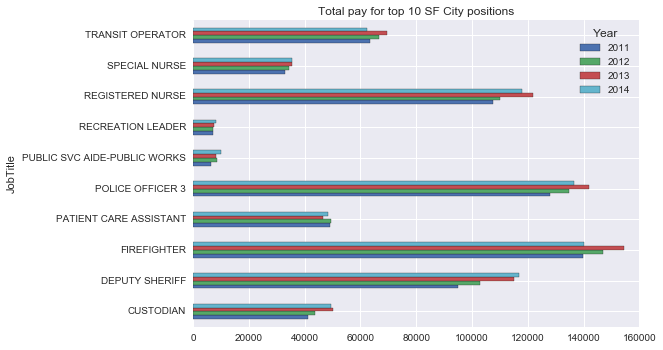

In [35]:
sal_info[sal_info.JobTitle.isin(top_ten_positions)].groupby(['Year','JobTitle'])['TotalPay'].mean().unstack('Year').plot(kind='barh')
plt.title('Total pay for top 10 SF City positions')

**Attempt to predict the gender based on the first name and come up with some gender based statistics**

In [36]:
names = sal_info['EmployeeName'].str.split()
sal_info['EmployeeFN'] = names.str[0]

In [37]:
def split_fname(full_name):
    names = full_name.split()
    if len(names[0]) == 1 and len(names)>2:
        fname = names[1]
    else:
        fname = names[0]
    return fname

In [38]:
sal_info['EmployeeFN_2'] = sal_info['EmployeeName'].apply(split_fname)

In [39]:
sal_info[sal_info.EmployeeFN_2>sal_info.EmployeeFN ].head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,EmployeeFN,EmployeeFN_2
1260,1261,J MICHAEL SWART,ATTORNEY (CIVIL/CRIMINAL),164352.66,0.00,0.00,NaN,164352.66,164352.66,2011,NaN,San Francisco,NaN,J,MICHAEL
5104,5105,K P KASHIMA,FIREFIGHTER,105676.26,3279.64,14568.16,NaN,123524.06,123524.06,2011,NaN,San Francisco,NaN,K,P
6050,6051,J JAMIE ONGPIN,POLICE OFFICER 3,112380.71,2501.34,3615.23,NaN,118497.28,118497.28,2011,NaN,San Francisco,NaN,J,JAMIE
8522,8523,F GABRIEL PEREZ,POLICE OFFICER I,96537.55,2525.79,5845.57,NaN,104908.91,104908.91,2011,NaN,San Francisco,NaN,F,GABRIEL
12418,12419,A JAMIL NIAZI,IS ENGINEER - PRINCIPAL,69058.19,0.00,18438.02,NaN,87496.21,87496.21,2011,NaN,San Francisco,NaN,A,JAMIL
14147,14148,P RORRIE TINIAKOFF,DEPUTY PROBATION OFFICER,80993.42,0.00,0.00,NaN,80993.42,80993.42,2011,NaN,San Francisco,NaN,P,RORRIE
15592,15593,C CHANDLER WHITE-JR,WORKER'S COMPENSATION ADJUSTER,75005.67,0.00,624.00,NaN,75629.67,75629.67,2011,NaN,San Francisco,NaN,C,CHANDLER
19129,19130,B JENNY ROGERS,RECREATION SUPERVISOR,64065.36,0.00,1722.49,NaN,65787.85,65787.85,2011,NaN,San Francisco,NaN,B,JENNY
24670,24671,C MONICA FABIANO,TELEPHONE OPERATOR,45797.23,3882.63,430.31,NaN,50110.17,50110.17,2011,NaN,San Francisco,NaN,C,MONICA
28469,28470,A ELIZABETH MARCHASIN,PRINCIPAL CLERK,23591.80,0.00,2691.06,NaN,26282.86,26282.86,2011,NaN,San Francisco,NaN,A,ELIZABETH


In [40]:
from nltk import NaiveBayesClassifier,classify
import USSSALoader
import random

class genderPredictor(object):
    
    def __init__(self,name='Sam'):
        self.name = name
        
    def getFeatures(self):
        maleNames,femaleNames=self._loadNames()
        
        featureset = list()
        
        for nameTuple in maleNames:
            features = self._nameFeatures(nameTuple[0])
            male_prob, female_prob = self._getProbDistr(nameTuple)
            features['male_prob'] = male_prob
            features['female_prob'] = female_prob
            featureset.append((features,'M'))
        
        for nameTuple in femaleNames:
            features = self._nameFeatures(nameTuple[0])
            male_prob, female_prob = self._getProbDistr(nameTuple)
            features['male_prob'] = male_prob
            features['female_prob'] = female_prob
            featureset.append((features,'F'))
    
        return featureset
    
    def trainAndTest(self,trainingPercent=0.80):
        featureset = self.getFeatures()
        random.shuffle(featureset)
        
        name_count = len(featureset)
        
        cut_point=int(name_count*trainingPercent)
        
        train_set = featureset[:cut_point]
        test_set  = featureset[cut_point:]
        
        self.train(train_set)
        
        return self.test(test_set)
        
    def classify(self, name):
        feats=self._nameFeatures(name)
        return self.classifier.classify(feats)
        
    def train(self,train_set):
        self.classifier = NaiveBayesClassifier.train(train_set)
        return self.classifier
        
    def test(self,test_set):
        return classify.accuracy(self.classifier,test_set)
    
    def _getProbDistr(self,nameTuple):
            male_prob = (nameTuple[1] * 1.0) / (nameTuple[1] + nameTuple[2])
            if male_prob == 1.0:
                male_prob = 0.99
            elif male_prob == 0.0:
                male_prob = 0.01
            else:
                pass
            female_prob = 1.0 - male_prob
            return (male_prob, female_prob)
        
    def getMostInformativeFeatures(self,n=5):
        return self.classifier.most_informative_features(n)
        
    def _loadNames(self):
        return USSSALoader.getNameList()
        
    def _nameFeatures(self, name):
        name=name.upper()
        return {
            'last_letter': name[-1],
            'last_two' : name[-2:],
            'last_three': name[-3:],
            'last_is_vowel' : (name[-1] in 'AEIOUY')
        }


In [41]:
gp = genderPredictor('Sam')
#gp.name
a=gp.trainAndTest()
gp.getMostInformativeFeatures(10)
gp.classify('Nick')

names.pickle exists, loading data
names.pickle loaded
32031 male names loaded, 56347 female names loaded


'M'

In [42]:
sal_info['Gender'] = sal_info.EmployeeFN_2.apply(gp.classify)


In [43]:
sal_info.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,EmployeeFN,EmployeeFN_2,Gender
0,1,NATHANIEL FORD,"GEN MGR, PUBLIC TRNSP DEPT",167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,NATHANIEL,NATHANIEL,M
1,2,GARY JIMENEZ,CAPTAIN 3,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,GARY,GARY,F
2,3,ALBERT PARDINI,CAPTAIN 3,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,ALBERT,ALBERT,M
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHRISTOPHER,CHRISTOPHER,M
4,5,PATRICK GARDNER,ASSISTANT DEPUTY CHIEF 2,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,PATRICK,PATRICK,M


The gender classifier doesnt work with good accuracy. For example Kenneth was classified as 'Female' and gave me problems in analysis down the road.

In [44]:

sal_info[sal_info.EmployeeFN_2=='KENNETH']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,EmployeeFN,EmployeeFN_2,Gender
60,61,KENNETH SMITH,"LIEUTENANT, FIRE DEPARTMENT",123105.00,99584.94,16113.62,NaN,238803.56,238803.56,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
378,379,KENNETH CORDERO,"LIEUTENANT, FIRE DEPARTMENT",127203.03,47341.24,17982.25,NaN,192526.52,192526.52,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
645,646,KENNETH HUPKE,"LIEUTENANT, FIRE DEPARTMENT",123105.02,41689.64,16302.93,NaN,181097.59,181097.59,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
717,718,KENNETH COFFLIN,"INSPECTOR, BUREAU OF FIRE PREVENTION AND PUBLI...",138086.86,2100.00,38237.27,NaN,178424.13,178424.13,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
986,987,KENNETH LOMBARDI,"CAPTAIN, FIRE SUPPRESSION",135103.40,23598.47,11377.28,NaN,170079.15,170079.15,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
1099,1100,KENNETH ESPOSTO,"INSPECTOR III, (POLICE DEPARTMENT)",130457.87,22262.03,14752.30,NaN,167472.20,167472.20,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
1277,1278,KENNETH ROUX,ATTORNEY (CIVIL/CRIMINAL),164352.66,0.00,0.00,NaN,164352.66,164352.66,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
1352,1353,KENNETH SALMON,MANAGER VII,163929.74,0.00,0.00,NaN,163929.74,163929.74,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
1355,1356,KENNETH BUKOWSKI,DEPUTY DIRECTOR III,163845.00,0.00,0.00,NaN,163845.00,163845.00,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F
1889,1890,KENNETH STOCKER,"INSPECTOR III, (POLICE DEPARTMENT)",130457.93,18165.94,6172.53,NaN,154796.40,154796.40,2011,NaN,San Francisco,NaN,KENNETH,KENNETH,F


In [45]:
sal_info[sal_info.JobTitle=='ASSISTANT DEPUTY CHIEF 2']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,EmployeeFN,EmployeeFN_2,Gender
4,5,PATRICK GARDNER,ASSISTANT DEPUTY CHIEF 2,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,PATRICK,PATRICK,M
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF 2,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,DAVID,DAVID,M
29,30,MONICA FIELDS,ASSISTANT DEPUTY CHIEF 2,246225.60,0.00,15140.54,NaN,261366.14,261366.14,2011,NaN,San Francisco,NaN,MONICA,MONICA,F
42,43,THOMAS SIRAGUSA,ASSISTANT DEPUTY CHIEF 2,218930.76,4078.00,27330.59,NaN,250339.35,250339.35,2011,NaN,San Francisco,NaN,THOMAS,THOMAS,M
57,58,MARK KEARNEY,ASSISTANT DEPUTY CHIEF 2,217410.80,0.00,22608.30,NaN,240019.10,240019.10,2011,NaN,San Francisco,NaN,MARK,MARK,M
223,224,BARBARA SCHULTHEIS,ASSISTANT DEPUTY CHIEF 2,109667.03,13707.84,79648.18,NaN,203023.05,203023.05,2011,NaN,San Francisco,NaN,BARBARA,BARBARA,F
229,230,FRANK CARDINALE,ASSISTANT DEPUTY CHIEF 2,183500.80,0.00,18933.10,NaN,202433.90,202433.90,2011,NaN,San Francisco,NaN,FRANK,FRANK,M
621,622,THOMAS DOUDIET,ASSISTANT DEPUTY CHIEF 2,115294.00,77.41,66489.33,NaN,181860.74,181860.74,2011,NaN,San Francisco,NaN,THOMAS,THOMAS,M
36173,36174,MARK KEARNEY,ASSISTANT DEPUTY CHIEF 2,124573.50,22599.60,180516.68,32381.00,327689.78,360070.78,2012,NaN,San Francisco,NaN,MARK,MARK,M
36179,36180,MICHAEL MORRIS,ASSISTANT DEPUTY CHIEF 2,223371.00,7415.52,63426.03,56202.98,294212.55,350415.53,2012,NaN,San Francisco,NaN,MICHAEL,MICHAEL,M
